- Viswatej Seela - VS26276
- Rochan - RRN479
- Kshitij -KSM3267
- Ankit - AM223225
- Krish - KE7466

- URL - "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"


In [99]:
# !pip install selenium
# !apt-get -q update   
# !apt install -yq chromium-chromedriver 
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
## if you are a mac user then you need to download the latest chromedriver and then move it to the /usr/lib and then run your scripts below


In [100]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import seaborn as sns
from selenium import webdriver 
import sys
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from matplotlib import pyplot as plt
import io
from collections import Counter
import numpy as np
from nltk.corpus import wordnet
from scipy.stats import rankdata
from sklearn.linear_model import LinearRegression




[nltk_data] Downloading package punkt to /Users/viswatej/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viswatej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def split_words(messages_column):
    corpus = ""
    for words in messages_column:
        corpus += words
    return corpus


def model_to_brand(s):
    for i in brand_df.index.values:
        s = s.replace(brand_df["model"][i].lower(),brand_df["brand"][i].lower())
    return s

def zipf_frequency(most_common_count, n=100):
    zipf_law = []
    for x in range(1, n+1):
        zipf_law.append(most_common_count/(x))
    return zipf_law


def remove_stopwords(s):
    return [i for i in s if not i in stop_words] 

def aspiration_words(x):
    for i in aspiration_list:
        x = x.replace(i,'aspiration')
    return x



In [102]:
sys.path.insert(0,'/usr/local/bin/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [103]:
# wd = webdriver.Chrome('chromedriver',options=chrome_options) # This will open up a chrome window
# url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
# wd.get(url)  # Open that website

In [104]:
# scrapped = pd.DataFrame(columns = ['Date', 'scrapped']) 
# #considering the latest tweets 
# for p in range(334,435):
#     page_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p" + str(p)
#     wd.get(page_url)

#     ids = wd.find_elements("xpath","//*[contains(@id,'Comment_')]")

#     comment_ids = []
#     for i in ids:
#         comment_ids.append(i.get_attribute('id'))

#     for x in comment_ids:
#         user_date = wd.find_elements("xpath",'//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
#         date = user_date.get_attribute('title')

#         user_message = wd.find_elements("xpath",'//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
#         comment = user_message.text

#         scrapped.loc[len(scrapped)] = [date, comment]


In [105]:
# scrapped1=scrapped.copy()
# scrapped1['scrapped']

In [106]:
# scrapped1["scrapped"] = scrapped1["scrapped"].str.replace(r'^.*@\w*\n|^.*: | ^.*\n\w*\n', '')
# scrapped1["scrapped"] = scrapped1["scrapped"].str.replace(r'^.*\n\w*\n|^.*\n*@\w* :', '')
# scrapped1["scrapped"] = scrapped1["scrapped"].str.replace(r'^.*:', '')
# scrapped1


In [107]:
# scrapped1.tail(5000).to_csv('webscraped.csv')

#### Task A: 
- Once you fetch the data, test if the data support Zipf’s law econometrically. Also plot the most  common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [108]:
webscraped_df = pd.read_csv('webscraped.csv')
webscraped_df.drop(columns = 'Unnamed: 0', inplace = True)
webscraped_df.shape

(5000, 2)

In [109]:
webscraped_df['scrapped'] = webscraped_df['scrapped'].astype(str)
webscraped_df['scrapped'] = webscraped_df['scrapped'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))
webscraped_df['scrapped'] = webscraped_df['scrapped'].apply(lambda x :x.lower())
webscraped_df['scrapped']=webscraped_df['scrapped'].apply(lambda e : re.sub(r'[^\w\s]','',str(e)).replace('\n',' ') )

In [110]:
webscraped_df

,Date,scrapped
0,"February 25, 2014 6:50PM",you hit the nail on the head you budget for re...
1,"February 25, 2014 7:09PM",now that i have inherited my acura tl back a 2...
2,"February 25, 2014 7:25PM",even with the coil packs you had to replace it...
3,"February 26, 2014 10:59AM",exactly you have to evaluate all your options ...
4,"February 26, 2014 11:14AM",exactly you have to evaluate all your options ...
...,...,...
4995,"February 25, 2020 11:42AM",but the only toyotalexus car i would seriousl...
4996,"February 25, 2020 11:55AM",btw i looked into incentives on stinger up to ...
4997,"February 25, 2020 11:58AM",btw i looked into incentives on stinger up to...
4998,"February 25, 2020 12:30PM",show previous quotes 12200 lease cash for 24 ...


In [111]:
corpus = split_words(webscraped_df['scrapped']).lower()

#tokenization
tokens = nltk.word_tokenize(corpus)

word_frequencies =Counter(tokens)

Text(0, 0.5, 'Frequency of a Word')

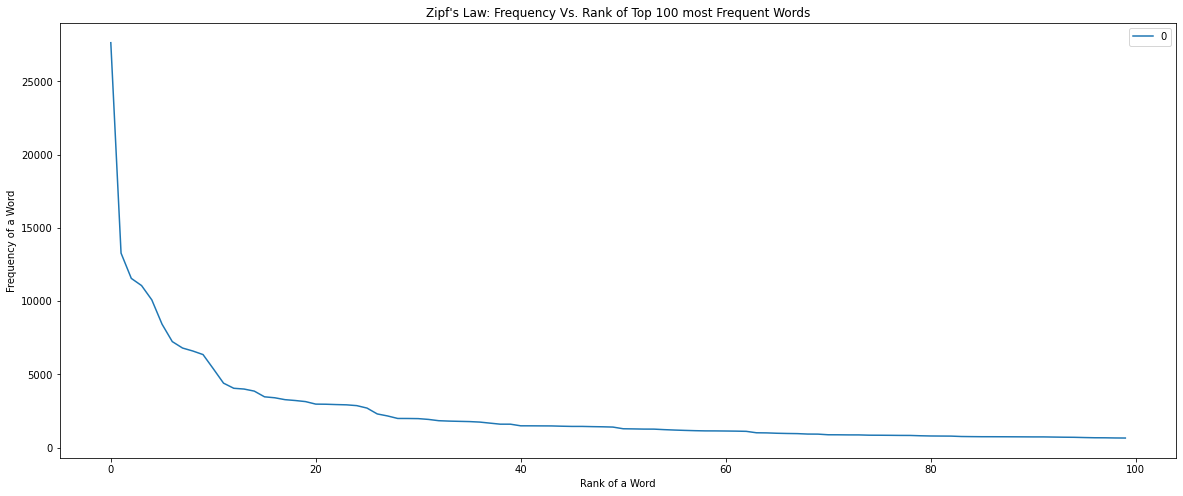

In [112]:
most_used_100={i:j for i,j in sorted(word_frequencies.items(), key=lambda d:d[1],reverse=True)}
pd.Series(most_used_100).reset_index().head(100).plot(kind='line',figsize=(20,8),xlabel='Rank',ylabel='Frequency')
plt.title('Zipf\'s Law: Frequency Vs. Rank of Top 100 most Frequent Words')
plt.xlabel('Rank of a Word')
plt.ylabel('Frequency of a Word')

In [113]:

word_ct_synonyms=[(k,v,len(wordnet.synsets(k))) for k,v in word_frequencies.items()]


df_wrd=pd.DataFrame(word_ct_synonyms)
df_wrd.columns=['word','count','synonms_count']

In [114]:
df_wrd[['count_rank','synonms_rank']]=df_wrd[['count','synonms_count']].rank(ascending=False)

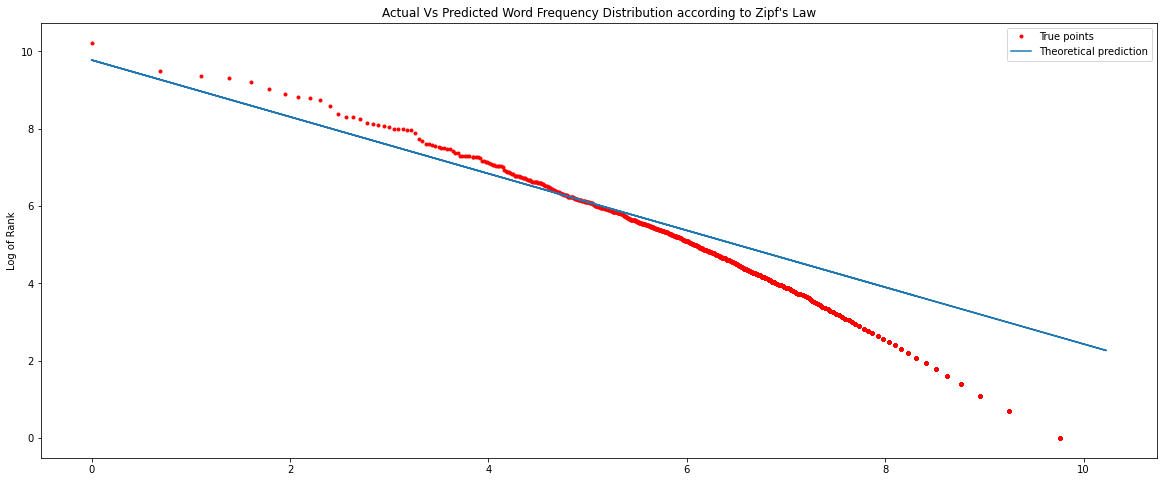

In [115]:

model=LinearRegression()

model.fit(np.log(df_wrd['count']).to_frame(),np.log(df_wrd['count_rank']))


plt.figure(figsize=(20,8))

plt.plot(np.log(df_wrd['count_rank']),np.log(df_wrd['count']),'r.',label='True points ')
plt.plot(np.log(df_wrd['count']),model.predict(np.log(df_wrd['count']).to_frame()),label='Theoretical prediction')
plt.title('Actual Vs Predicted Word Frequency Distribution according to Zipf\'s Law')
plt.ylabel('Log of Frequency')
plt.ylabel('Log of Rank')

plt.legend()
plt.show()

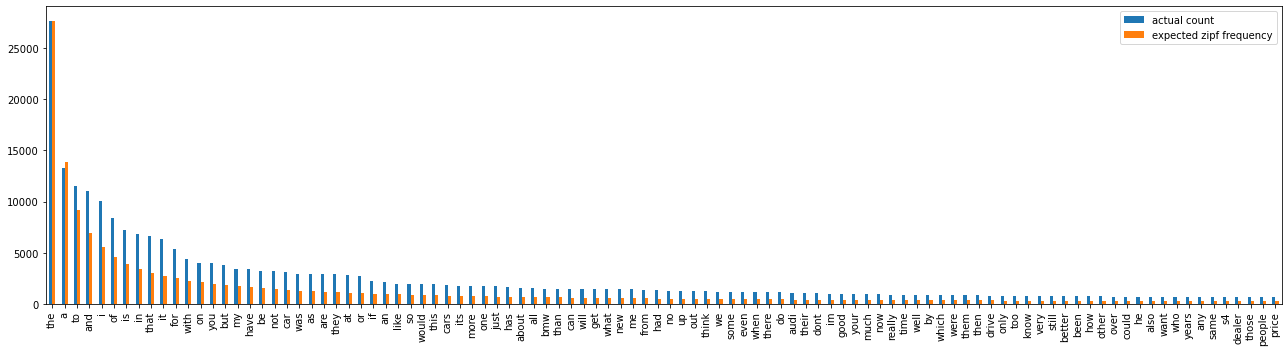

In [116]:
topwords_df = pd.DataFrame(word_frequencies.most_common(100), columns=['word', 'actual count'])
topwords_df['expected zipf frequency'] = zipf_frequency(topwords_df.loc[0, 'actual count'])

fig, ax = plt.subplots(figsize=(18,5))
topwords_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(topwords_df['word'])
fig.tight_layout()

#### Task B:
- Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.

In [117]:
brand_df = pd.read_csv('car models and brands (3).csv')
brand_df.columns = ['brand','model']
brand_df.head()

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [118]:
webscraped_df['scrapped_model_replaced_brand'] = webscraped_df['scrapped'].apply(model_to_brand)

In [119]:
stop_words = stopwords.words('english') 
webscraped_df['scrapped_model_replaced_brand_words'] = webscraped_df['scrapped_model_replaced_brand'].apply(word_tokenize).apply(set)
webscraped_df['scrapped_model_replaced_brand_words'] =  webscraped_df['scrapped_model_replaced_brand_words'].apply(remove_stopwords)
webscraped_df

,Date,scrapped,scrapped_model_replaced_brand,scrapped_model_replaced_brand_words
0,"February 25, 2014 6:50PM",you hit the nail on the head you budget for re...,you hit the nail on the head you budget for re...,"[picture, big, new, payment, budget, years, tr..."
1,"February 25, 2014 7:09PM",now that i have inherited my acura tl back a 2...,now that i have inherited my acura tl back a 2...,"[end, good, inherited, 174k, notice, last, scr..."
2,"February 25, 2014 7:25PM",even with the coil packs you had to replace it...,even with the coil packs you had to replace it...,"[large, roadburner, shelling, new, v6, well, c..."
3,"February 26, 2014 10:59AM",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...,"[buy, slightest, malfunction, new, evaluate, w..."
4,"February 26, 2014 11:14AM",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...,"[buy, slightest, smells, religiously, thats, r..."
...,...,...,...,...
4995,"February 25, 2020 11:42AM",but the only toyotalexus car i would seriousl...,but the only toyotalexus car i would seriousl...,"[supra, also, well, consider, sense, abou, toy..."
4996,"February 25, 2020 11:55AM",btw i looked into incentives on stinger up to ...,btw i looked into incentives on stinger up to ...,"[great, deal, big, may, lease, thats, incentiv..."
4997,"February 25, 2020 11:58AM",btw i looked into incentives on stinger up to...,btw i looked into incentives on stinger up to...,"[thats, especially, inflated, 6, levels, real,..."
4998,"February 25, 2020 12:30PM",show previous quotes 12200 lease cash for 24 ...,show previous quotes 12200 lease cash for 24 ...,"[deal, terms, awd, lease, thats, 6, levels, in..."


In [120]:
all_words = []
for i in range(len(webscraped_df)):
    all_words+=webscraped_df['scrapped_model_replaced_brand_words'][i]
from nltk import FreqDist
word_freq = nltk.FreqDist(all_words)

In [121]:
brand_names = brand_df['brand'].unique()
brand_names

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'hyundai,', 'hyundai.', 'infiniti', 'kia', 'kia,', 'kia.',
       'lincoln', 'mazda', 'mercedes', 'mercedes benz', 'mercedes-benz',
       'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'problem',
       'saturn', 'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo'], dtype=object)

In [122]:
brand_counts = []
for key,item in word_freq.most_common():
    if key in brand_names:
        temp = (key,item)
        brand_counts.append(temp)

In [123]:
brands_sorted_df = pd.DataFrame(brand_counts, columns = ['Brand','Freq'])
brands_sorted_df

,Brand,Freq
0,car,2102
1,bmw,1156
2,audi,853
3,acura,522
4,honda,463
5,seat,291
6,sedan,281
7,problem,257
8,volkswagen,256
9,mercedes-benz,226


In [124]:
brands_sorted_df.drop([0, 5, 6, 7], axis = 0, inplace =True)
brands_sorted_df.reset_index()

,index,Brand,Freq
0,1,bmw,1156
1,2,audi,853
2,3,acura,522
3,4,honda,463
4,8,volkswagen,256
5,9,mercedes-benz,226
6,10,toyota,224
7,11,cadillac,224
8,12,hyundai,216
9,13,infiniti,195


In [125]:
brands_sorted_df[:10]

,Brand,Freq
1,bmw,1156
2,audi,853
3,acura,522
4,honda,463
8,volkswagen,256
9,mercedes-benz,226
10,toyota,224
11,cadillac,224
12,hyundai,216
13,infiniti,195


Text(0.5, 1.0, 'Top 10 brands - Frequency table')

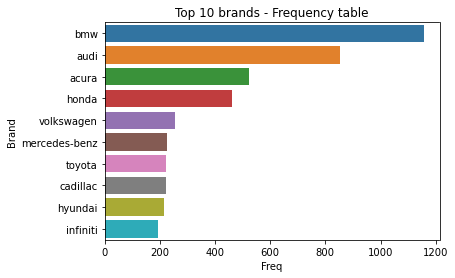

In [126]:
sns.barplot(y='Brand', x='Freq', data=brands_sorted_df[:10]).set_title('Top 10 brands - Frequency table')

#### Task C:
- Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have  to write a script to do this task). For lift calculations, be sure not to count a mention more than once  per post, even if it is mentioned multiple times in the post.

In [127]:
top_brands = list(brands_sorted_df['Brand'][:10])
top_brands

['bmw',
 'audi',
 'acura',
 'honda',
 'volkswagen',
 'mercedes-benz',
 'toyota',
 'cadillac',
 'hyundai',
 'infiniti']

In [128]:
import itertools

top_brand_combos = list(itertools.combinations(top_brands,2))
webscraped_df['scrapped_model_replaced_brand_words']

0       [picture, big, new, payment, budget, years, tr...
1       [end, good, inherited, 174k, notice, last, scr...
2       [large, roadburner, shelling, new, v6, well, c...
3       [buy, slightest, malfunction, new, evaluate, w...
4       [buy, slightest, smells, religiously, thats, r...
                              ...                        
4995    [supra, also, well, consider, sense, abou, toy...
4996    [great, deal, big, may, lease, thats, incentiv...
4997    [thats, especially, inflated, 6, levels, real,...
4998    [deal, terms, awd, lease, thats, 6, levels, in...
4999                                                [wow]
Name: scrapped_model_replaced_brand_words, Length: 5000, dtype: object

In [129]:
def liftCalc(word_1,word_2):
    w1freq = sum(webscraped_df.apply(lambda x: word_1 in x['scrapped_model_replaced_brand_words'], axis=1))
    w2freq = sum(webscraped_df.apply(lambda x: word_2 in x['scrapped_model_replaced_brand_words'], axis=1))
    bothfreq = sum(webscraped_df.apply(lambda x: word_1 in x['scrapped_model_replaced_brand_words'] and word_2 in x['scrapped_model_replaced_brand_words'], axis=1))
    return float(bothfreq/len(webscraped_df))/((float(w1freq)/len(webscraped_df))*(float(w2freq)/len(webscraped_df)))

In [130]:
brand_lifts = dict()

#iterate over brand combinations, calculate lift, save to dictionary
for i in range(0,len(top_brand_combos)): 
    a,b = top_brand_combos[i]
    brands = (a,b)
    lift = liftCalc(a,b)
    brand_lifts[brands] = lift

In [131]:
df_lifts = pd.DataFrame(columns=top_brands,index=top_brands)
for brand in top_brands: 
    df_lifts[brand][brand] = np.NaN
for brands in brand_lifts:
    a,b = brands
    df_lifts[a][b] = (brand_lifts[brands])
    df_lifts[b][a] = (brand_lifts[brands])
df_lifts

,bmw,audi,acura,honda,volkswagen,mercedes-benz,toyota,cadillac,hyundai,infiniti
bmw,NaN,1.896421,1.458325,1.102334,1.132002,3.004716,1.44819,2.027465,1.321607,2.351167
audi,1.896421,NaN,2.279536,1.671144,2.656067,3.605183,1.700929,3.087841,1.791064,3.066102
acura,1.458325,2.279536,NaN,3.31008,1.309567,3.051572,1.667693,2.950534,1.640769,4.961195
honda,1.102334,1.671144,3.31008,NaN,2.024838,1.624649,3.42294,1.542734,2.199824,2.215207
volkswagen,1.132002,2.656067,1.309567,2.024838,NaN,1.642008,2.092634,1.220703,2.350984,2.003205
mercedes-benz,3.004716,3.605183,3.051572,1.624649,1.642008,NaN,1.87658,6.02481,2.355785,5.672793
toyota,1.44819,1.700929,1.667693,3.42294,2.092634,1.87658,NaN,1.893335,3.203538,2.289377
cadillac,2.027465,3.087841,2.950534,1.542734,1.220703,6.02481,1.893335,NaN,1.860119,5.265568
hyundai,1.321607,1.791064,1.640769,2.199824,2.350984,2.355785,3.203538,1.860119,NaN,3.08642
infiniti,2.351167,3.066102,4.961195,2.215207,2.003205,5.672793,2.289377,5.265568,3.08642,NaN


<AxesSubplot:>

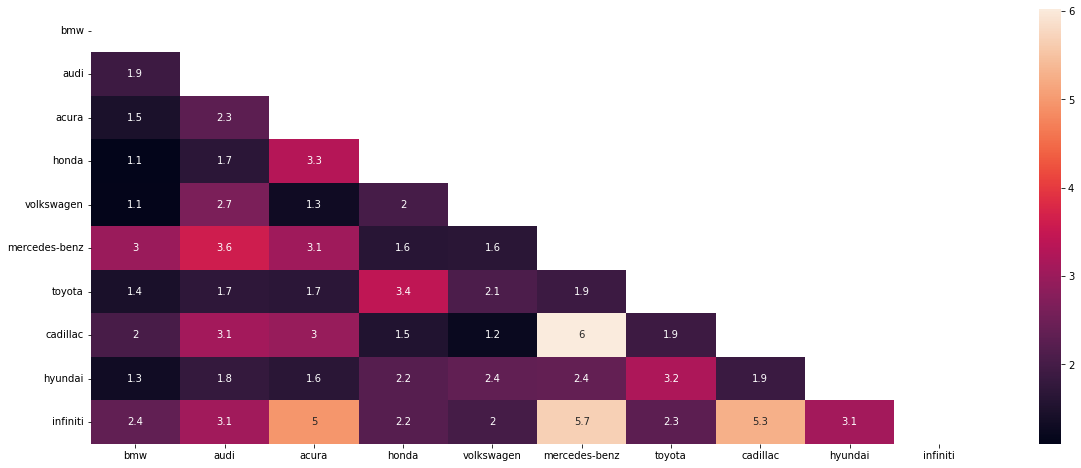

In [132]:
plt.figure(figsize=(20,8))
sns.heatmap(df_lifts.fillna(0),annot=True,mask=np.triu(df_lifts))

#### Task D 
- Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there  are multiple scripts available on GitHub). 

/Users/viswatej/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


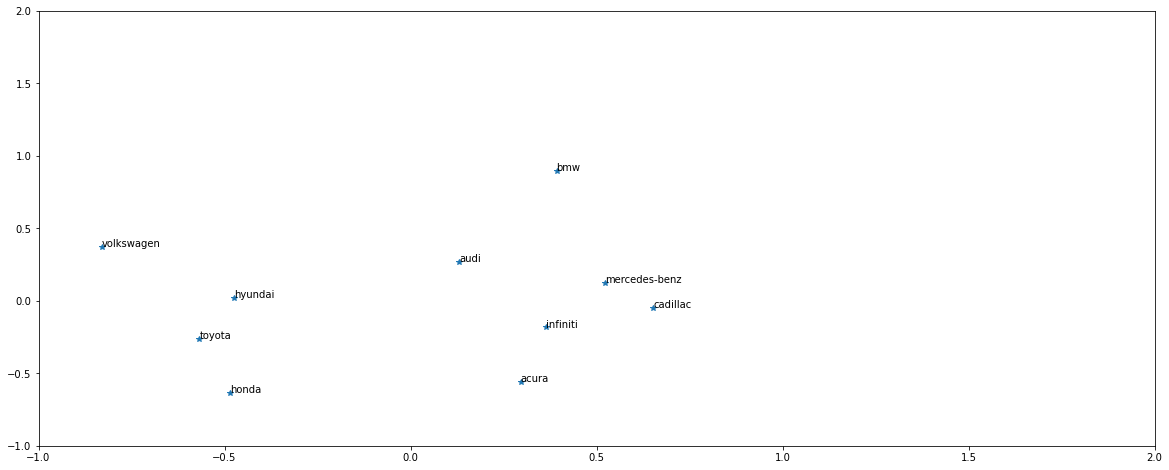

In [133]:
from sklearn.manifold import MDS
df_lift = pd.DataFrame(df_lifts)
df_disimilarity=1/df_lift
df_disimilarity.fillna(0,inplace=True)
df_disimilarity


mds=MDS(n_components=2)

npos=mds.fit_transform(df_disimilarity)

# df_disimilarity.index
plt.figure(figsize=(20,8))

plt.plot(npos[:,0],npos[:,1],'*')
plt.ylim(-1,2)
plt.xlim(-1,2)


for i in range(len(npos)):
  plt.text(npos[i,0],npos[i,1],df_disimilarity.index[i])

#### Task E
- What insights can you offer to your client from your analyses in Tasks C and D 


1. High Association: It can be seen from the Lift Matrix that there is high association between Cadillac and Mercedes-benz, Infiniti and Mercedes Benz, Acura and Infiniti, Cadillac and Infiniti

2. Low Association: BMW and Honda, Volkswagen and BMW, BMW and and Hyundai , Acura and Volkswagen

3. BMW has relatively less competition. It has low lifts with other brands in the top 10, but highest frequency. This could mean that BMW's competitor brand is not in the top 10. This could also mean people tend to make less comparisons with BMW and simply say more about its performance.

4. We basically see 2 clusters being formed.  1 of Non American Brands and 2 all other brands, suprisingly BMW does'nt appear to be falling in any of the clusters

5. Mercedes-Benz suprisingly has high lift with premium brands like Infiniti and Cadillac.This can be due to people comparing Benz with other brands.

#### Task F:
- What are 5 most frequently mentioned attributes or features of cars in the discussions?  Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do  a sentiment analysis for this assignment

In [134]:
nltk.download('averaged_perceptron_tagger')

temp=set(list(i for i,j in nltk.pos_tag(word_freq.keys()) if 'nn' in j.lower()))
df_noun=pd.Series({i:j for i,j in word_freq.items() if i in temp})

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/viswatej/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [135]:
print(*df_noun.sort_values(ascending=False).iloc[:150].index,sep='\t')

car	bmw	dont	time	drive	years	acura	show	way	people	price	honda	dealer	quotes	right	take	thats	lot	something	miles	thing	tchrysler	doesnt	year	model	cant	performance	s4	point	engine	look	course	luxury	didnt	money	bit	seat	cost	sedan	lease	test	market	brand	problem	looks	power	volkswagen	things	series	isnt	premium	yes	dealers	feel	anything	couple	work	interior	cadillac	experience	benz	service	deal	hyundai	vehicle	class	today	guess	transmission	reason	wife	tires	base	hp	issue	love	sales	road	msrp	drove	models	warranty	wouldnt	pay	day	days	package	part	nothing	ill	months	option	fun	line	torque	issues	suspension	cts	sell	vehicles	ltoyota	fact	difference	others	size	value	options	case	times	system	tell	vs	ats	youre	kind	version	wheel	folks	wasnt	wheels	someone	side	mb	ride	month	guy	dealership	entry	volvo	start	track	company	kia	care	theres	mpg	remember	world	buyers	auto	place	sound	reliability	order	chevrolet	anyone	brands	oil	c	havent


- **We manually picked top 5 features: performance, luxury, engine, price, power.**

In [136]:
best_5features = np.array(['price', 'luxury', 'engine', 'performance', 'power']) # we can discuss this i feel brand and market can be features, again depends on perspective 
best_5features

array(['price', 'luxury', 'engine', 'performance', 'power'], dtype='<U11')

In [137]:
features_lift = pd.DataFrame(columns = ['Brand', 'Feature', 'Lift'])
for i in range(10):
    for j in range(5):
        top_brands[i]
        best_5features[j]
        na2 = 0
        nb2 = 0
        nab2 = 0
        for k in webscraped_df['scrapped_model_replaced_brand_words']:
            if top_brands[i] in k:
                na2 += 1
                if best_5features[j] in k:
                    nab2 += 1
            if best_5features[j] in k:
                nb2 += 1
        lifts2 = ((nab2 * 5000) / (na2 * nb2))
        features_lift.loc[len(features_lift)] = [top_brands[i], best_5features[j], lifts2]
features_lift = features_lift.pivot(index='Brand', columns='Feature', values='Lift')
features_lift.sort_index(inplace=True)
features_lift.sort_values(by=['luxury','price','engine','performance','power'])
features_lift.sort_values(by='luxury', ascending=False)

Feature,engine,luxury,performance,power,price
Brand,,,,,
cadillac,0.750874,3.301562,1.988403,1.042246,2.241291
mercedes-benz,1.150172,3.058931,2.479402,1.033022,2.312128
hyundai,1.628157,2.902822,1.529906,1.351059,2.371736
infiniti,1.725084,2.638305,2.357795,1.297017,1.996637
acura,1.786823,2.125143,1.899194,1.565365,1.629138
audi,1.667079,2.092105,2.189702,1.779027,2.065997
toyota,1.092180,2.081419,1.924261,1.910784,1.921107
honda,1.717294,1.944539,1.489536,1.344640,1.593315
bmw,1.521116,1.724541,1.814620,1.800789,1.905596


#### Task G
- What advice will you give to your client from Task F? For this assignment, you can assume that all sentiments are positive. 


1. Cadillac, Mercedes-Benz and Hyundai have high association with Luxury. Unexpectedly, there is low association between BMW and luxury.

2. Mercedes-Benz has high association with price and luxury.

3. Lot of brands have low lift with Engine. 

4. Cadillac has high mentions with Luxury, more than premium brands like Audi, BMW and Mercedes.  

5. Luxury seams to be the differentiating factor, Cadillac has the highest lift while volkswagen and BMW  have almost  the lowest. 

6. Even though the perforamnce of Toyota has the highest lift , surprisingly people don't associate it with Luxury 

7. Acura has the highest lift with Engine.


#### Task H
- Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?
 

In [138]:
aspiration_list=['desire to','desirable','fancy car','eager to buy','would like to buy','love to have','dream car','really want','future car','dream of',"cant wait to buy",'would love to buy','wish to buy','want to buy','aspire to','future car','thinking to buy','love to buy','want to own','love to own','like to own','have to own','nice to own','nice to buy','have to buy','would love to buy','would like to buy','wish to own','looking to buy','looking forward to buy',"next car", "winner", "favor", "prefer", "most promise", "bang for your buck", "bang for buck", "go drive", 
       "go for", "want", "heart", "dream", "buy", "purchase", "love", "wanted", "decided to", "desire",
       "desirable", "go with", "top of", "better value", "seriously look",
       'anticipate', 'expect','would like to buy','would love to buy',
             'eager to buy','love to have',
             'desire to','dream of', 'dream to', 'love to','to own'
             'desire','dream','love','want','own']

In [139]:
aspiration_list=np.unique(aspiration_list)

In [140]:
brand_df['Brand'] = brand_df['brand'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))

In [141]:
webscraped_df['scrapped_model_replaced_brand_stop_words'] = webscraped_df['scrapped'].apply(model_to_brand)

In [142]:
webscraped_df['aspirational_words'] = webscraped_df['scrapped_model_replaced_brand_stop_words'].apply(aspiration_words)

In [143]:
webscraped_df

,Date,scrapped,scrapped_model_replaced_brand,scrapped_model_replaced_brand_words,scrapped_model_replaced_brand_stop_words,aspirational_words
0,"February 25, 2014 6:50PM",you hit the nail on the head you budget for re...,you hit the nail on the head you budget for re...,"[picture, big, new, payment, budget, years, tr...",you hit the nail on the head you budget for re...,you hit the nail on the head you budget for re...
1,"February 25, 2014 7:09PM",now that i have inherited my acura tl back a 2...,now that i have inherited my acura tl back a 2...,"[end, good, inherited, 174k, notice, last, scr...",now that i have inherited my acura tl back a 2...,now that i have inherited my acura tl back a 2...
2,"February 25, 2014 7:25PM",even with the coil packs you had to replace it...,even with the coil packs you had to replace it...,"[large, roadburner, shelling, new, v6, well, c...",even with the coil packs you had to replace it...,even with the coil packs you had to replace it...
3,"February 26, 2014 10:59AM",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...,"[buy, slightest, malfunction, new, evaluate, w...",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...
4,"February 26, 2014 11:14AM",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...,"[buy, slightest, smells, religiously, thats, r...",exactly you have to evaluate all your options ...,exactly you have to evaluate all your options ...
...,...,...,...,...,...,...
4995,"February 25, 2020 11:42AM",but the only toyotalexus car i would seriousl...,but the only toyotalexus car i would seriousl...,"[supra, also, well, consider, sense, abou, toy...",but the only toyotalexus car i would seriousl...,but the only toyotalexus car i would seriousl...
4996,"February 25, 2020 11:55AM",btw i looked into incentives on stinger up to ...,btw i looked into incentives on stinger up to ...,"[great, deal, big, may, lease, thats, incentiv...",btw i looked into incentives on stinger up to ...,btw i looked into incentives on stinger up to ...
4997,"February 25, 2020 11:58AM",btw i looked into incentives on stinger up to...,btw i looked into incentives on stinger up to...,"[thats, especially, inflated, 6, levels, real,...",btw i looked into incentives on stinger up to...,btw i looked into incentives on stinger up to...
4998,"February 25, 2020 12:30PM",show previous quotes 12200 lease cash for 24 ...,show previous quotes 12200 lease cash for 24 ...,"[deal, terms, awd, lease, thats, 6, levels, in...",show previous quotes 12200 lease cash for 24 ...,show previous quotes 12200 lease cash for 24 ...


In [144]:
lift_df = pd.DataFrame(columns = ['brand', 'brand_count', 'aspiration_count', 'lift', 'aspiration_percent'])
lift_df['brand'] = brand_df['Brand'].unique()
overall_aspiration_count = 0
for comment in webscraped_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_aspiration_count += 1
n = len(webscraped_df)
n

5000

In [145]:
index = 0
for brand in lift_df['brand']:
    brand_count = 0
    aspiration_count = 0
    for comment in webscraped_df['aspirational_words']:
        if brand in comment:
            brand_count += 1
        if 'aspiration' in comment and brand in comment:
            aspiration_count += 1
        
    lift_df['brand_count'][index] = brand_count
    lift_df['aspiration_count'][index] = aspiration_count
    index += 1
lift_df

,brand,brand_count,aspiration_count,lift,aspiration_percent
0,acura,602,318,NaN,NaN
1,audi,1092,642,NaN,NaN
2,bmw,1204,719,NaN,NaN
3,buick,99,45,NaN,NaN
4,cadillac,258,151,NaN,NaN
5,car,2278,1341,NaN,NaN
6,chevrolet,168,112,NaN,NaN
7,chrysler,468,239,NaN,NaN
8,dodge,272,168,NaN,NaN
9,ford,298,192,NaN,NaN


In [146]:
lift_df=lift_df[(lift_df['brand_count'] != 0)]
lift_df
lift_df['aspiration_percent'] = lift_df['aspiration_count']/lift_df['brand_count']
lift_df['lift'] = (n*lift_df['aspiration_count'])/(lift_df['brand_count']*overall_aspiration_count)
lift_df.sort_values(by = 'lift', ascending = False)[:10]

/var/folders/lm/qkcrvy853g79ybtncmbrw98w0000gn/T/ipykernel_27835/3771748235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_df['aspiration_percent'] = lift_df['aspiration_count']/lift_df['brand_count']
/var/folders/lm/qkcrvy853g79ybtncmbrw98w0000gn/T/ipykernel_27835/3771748235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lift_df['lift'] = (n*lift_df['aspiration_count'])/(lift_df['brand_count']*overall_aspiration_count)


,brand,brand_count,aspiration_count,lift,aspiration_percent
29,suzuki,7,6,2.097755,0.857143
11,hyndai kia,6,5,2.039484,0.833333
25,saturn,20,16,1.957905,0.8
20,mercury,13,10,1.882601,0.769231
17,mercedes,238,159,1.635015,0.668067
6,chevrolet,168,112,1.631588,0.666667
24,problem,263,175,1.628486,0.665399
22,nissan,110,73,1.624171,0.663636
26,seat,305,197,1.580768,0.645902
9,ford,298,192,1.576836,0.644295


In [147]:
lift_df = pd.DataFrame(columns = ['brand', 'brand_count', 'aspiration_count', 'lift', 'aspiration_percent'])
lift_df['brand'] = top_brands
lift_df['brand'].replace('mercedes-benz', 'mercedes', inplace = True)

overall_aspiration_count = 0
for comment in webscraped_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_aspiration_count += 1
n = len(webscraped_df)

index = 0
for brand in lift_df['brand']:
    brand_count = 0
    aspiration_count = 0
    for comment in webscraped_df['aspirational_words']:
        if brand in comment:
            brand_count += 1
        if 'aspiration' in comment and brand in comment:
            aspiration_count += 1
        
    lift_df['brand_count'][index] = brand_count
    lift_df['aspiration_count'][index] = aspiration_count
    index += 1
lift_df
lift_df['aspiration_percent'] = lift_df['aspiration_count']/lift_df['brand_count']
lift_df['lift'] = (n*lift_df['aspiration_count'])/(lift_df['brand_count']*overall_aspiration_count)
lift_df.sort_values(by = 'lift', ascending = False)

,brand,brand_count,aspiration_count,lift,aspiration_percent
5,mercedes,238,159,1.635015,0.668067
3,honda,670,424,1.548791,0.632836
9,infiniti,214,130,1.486727,0.607477
6,toyota,1349,809,1.467703,0.599703
0,bmw,1204,719,1.461518,0.597176
1,audi,1092,642,1.438845,0.587912
7,cadillac,258,151,1.432382,0.585271
4,volkswagen,297,172,1.417339,0.579125
8,hyundai,242,137,1.385501,0.566116
2,acura,602,318,1.292803,0.528239


For Aspiration, we took all the terms we could think of ,that represent a person desiring to buy an automobile. Then we changed all of the sentences in the comments to Aspire and used lift between the words "Aspire" and Brands to determine which brands people were most interested in purchasing.



1. Mercedes, Honda are the brands people want to buy the most, which are highly associated with luxury as per our analysis 

2. Acura should be concerned as not many people want to buy this brand.  

3. Non American brands like Honda,Toyota surprisingly have better aspirational values compared to a few premium American brands like BMW, Audi.

4. Although Cadillac and Hyundai have high lift with Luxury their aspiration is low indicating that there may be a negetive relation to luxury.